In [1]:
from sys import path
from os.path import realpath
path.append(realpath("../")) # Makes it works everywhere
from common.functions import *
from functions import *
import serial
from time import sleep

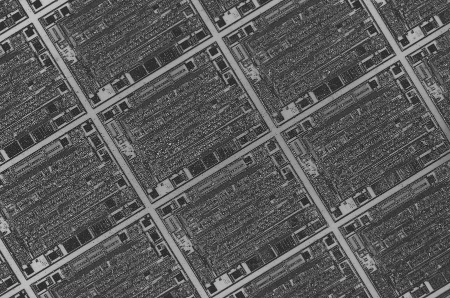

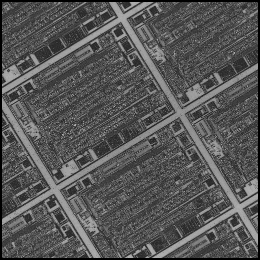

In [2]:
wafer = cv2.imread('imgs/testwafer_1.jpg')
wafer = cv2.cvtColor(wafer, cv2.COLOR_BGR2GRAY).astype(np.uint8)
h,w = wafer.shape[:2]
wafer = cv2.resize(wafer, (w//2, h//2))
h,w = wafer.shape[:2]
displayImage_fromcv2(img=wafer, w=w, h=h)
wafer = wafer[h//2-256//2:h//2+256//2,w//2-256//2:w//2+256//2]
wafer = np.pad(wafer, ((2,2),(2,2)))
h,w = wafer.shape[:2]
displayImage_fromcv2(img=wafer, w=w, h=h)

In [6]:
print(type(wafer), wafer.shape, wafer.size)

<class 'numpy.ndarray'> (597, 900) 537300


In [3]:
uart = serial.Serial(port='COM4', baudrate=115200)
uart.write(bytearray([255, 255, 255, 255, 255, 255, 255, 255, 255, 255], ))
print(uart.read(10))
uart.close()

b'\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff'


In [60]:
test = np.array([[1,2],[3,4]], dtype=np.uint8)
print(test)
mybytes = test.tobytes()
recov = np.frombuffer(mybytes, dtype=np.uint8).reshape((2,2))
print(recov)

[[1 2]
 [3 4]]
b'\x01\x02'
b'\x03\x04'


In [4]:
uart = serial.Serial(port='COM4', baudrate=115200, timeout=2)
test = np.array([[1,2],[3,4]], dtype=np.uint8)
mybytes = test.tobytes()
uart.write(mybytes)

4

In [5]:
recov = np.frombuffer(uart.read(uart.in_waiting), dtype=np.uint8).reshape((2,2))
print(recov)
uart.close()

[[1 2]
 [3 4]]


In [58]:
# Imagen
uart = serial.Serial(port='COM4', baudrate=9600, timeout=80, write_timeout=80)
uart.set_buffer_size(tx_size=h*w, rx_size=h*w)
data = wafer.tobytes()
try:
    written = uart.write(data)
    print(written)
except serial.SerialTimeoutException:
    print('Timeout catch')

67600


In [ ]:
rx = uart.read(uart.in_waiting)
if len(rx) == written:
    recov = np.frombuffer(rx, dtype=np.uint8).reshape((h,w))
    displayImage_fromcv2(img=recov, w=w, h=h)
else:
    print(f"Couldn't get all {written} bytes, got {len(rx)} instead.")
uart.close()

In [88]:
# Ceros
uart = serial.Serial(port='COM4', baudrate=9600, timeout=12, write_timeout=12)
# uart.set_buffer_size(tx_size=h*w, rx_size=h*w)
data = np.zeros(610, dtype=np.uint8).tobytes()
written = 0
try:
    written = uart.write(data)
    print(written)
except serial.SerialTimeoutException:
    print('Timeout catch')

610


In [89]:
rx = uart.read(uart.in_waiting)
if len(rx) == written:
    recov = np.frombuffer(rx, dtype=np.uint8).reshape((25,25))
    displayImage_fromcv2(img=recov, w=25, h=25)
else:
    print(f"Couldn't get all {written} bytes, got {len(rx)} instead.")
    print(any(rx))
uart.close()

Couldn't get all 610 bytes, got 592 instead.
False


In [57]:
uart = serial.Serial(port='COM4', baudrate=115200, timeout=12, write_timeout=12)
print(uart.read())
uart.close()

b'\x00'


In [101]:
uart = serial.Serial(port='COM4', baudrate=9600, timeout=80, write_timeout=80)
# uart.set_buffer_size(tx_size=h*w+200, rx_size=h*w+200)
# data = wafer.tobytes()
data = np.zeros(5, dtype=np.uint8).tobytes()
uart.write(data)

# for index, abyte in enumerate(data):
#     if index < 20:
#         try:
#             uart.write(bytes([abyte]))
#             sleep(1)
#         except serial.SerialTimeoutException:
#                 print('Timeout catch')

5

In [102]:
print(uart.in_waiting)
rx = uart.read(uart.in_waiting)
print(rx == data[:len(rx)], len(data[:len(rx)]))
print(rx)
uart.close()

0
True 0
b''


In [ ]:
while(uart.in_waiting < 260*260):
    pass
rx = uart.read(260*260)
recov = np.frombuffer(rx, dtype=np.uint8).reshape((260,260))
displayImage_fromcv2(img=recov, w=260, h=260)
uart.close()

In [101]:
print(uart.in_waiting)
print(1*260)
# print(h*w)
rx = uart.read(uart.in_waiting)
# print(data[260*2-10:260*2+20], rx[260*2-10:260*2+20])
uart.close()

130
260


In [75]:
uart.reset_input_buffer()
uart.close()